<a href="https://colab.research.google.com/github/DaegyuHwang/David_study/blob/main/assignment_for_11_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.전처리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### from sklearn.neighbors import KNeighborsClassifier

Url_heart_disease="https://raw.githubusercontent.com/DaegyuHwang/David_study/main/heart.csv"

### 자료 불러서 df라고 하자.

df = pd.read_csv(Url_heart_disease)

### 자료가 어떻게 생겼나?
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
### 뒤에서 10개를 볼까요?

df.tail(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
### 대충 정보를 확인하자.

# 데이터프레임의 크기 확인: 행(row) 수와 열(column) 수를 확인
# 데이터 타입 확인
# 누락된 값 확인 non-null 각 열의 비어있지 않은 값의 수를 나타낸다.
# 메모리 사용량 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#df=df.drop(['id',"Unnamed: 32"],axis=1)
# 필요없는 데이터 없는 것 같아 날리지 않았다.

# axis=1: 열을 기준으로 삭제하라는 뜻. 1은 열을 의미 만약 axis=0으로 설정하면 행 삭제

In [ ]:
# checking for missing values (결측치 확인)
df.isnull().sum()

# df: 데이터 프레임 / isnull() 결측치 이면 true 아니면 false/ .sum(): 각 열에 대해 true의 개수 합산

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# 결측치가 있을 때 다음과 같이 kNN을 사용한다면 다음과 같다. 결측치를 채워서 data_filled라는 곳에 임시로 넣었다.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 2)

data_filled = imputer.fit_transform(df.iloc[:,:13]) ## target은 수치가 아니므로 비워둔다.

print(type(data_filled)) ## numpy array type이기 때문에....

pd.DataFrame(data_filled) ## padas의 DataFrame으로 바꾸어 주었다.

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0


In [ ]:
### 이제 'diagnosis'부분을 정답이라고 하자.

y_original = df['target']

In [ ]:
### 윗부분은 M이 많다. 나중에 섞어야겠다.

y_original.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [ ]:
y_original.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [ ]:
y_original.unique()

## df['target'].unique()  /  해당열이 어떤 범주형 데이터 가지고 있는지, 0과 1가지고 있다

array([1, 0])

In [ ]:
### 값별의 데이터 숫자

y_original.value_counts()

## df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
### 이것이 원-핫 인코딩(one-hot encoding)이라는 것이다.

y_original_2=pd.get_dummies(y_original)

y_original_2.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
## 주어진 dataset을 train-Dset과 test-Dset으로 나누기, 계층의 비율을 유지한 상태로...

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:13], y_original_2[0],stratify=y_original_2[0], random_state=3)

# 13번째 열 포함 안한다는 의미, 결과 target이기에

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
244,56,1,0,132,184,0,0,105,1,2.1,1,1,1


In [ ]:
## Standardization

### Standardization을 합시다.
std = StandardScaler()

### X_train.iloc[:,0:]에서 Standardization에 필요한 정보를 뽑아 준비합시다. 예를 들어 평균과 표준편차를 준비합니다.
std.fit(X_train.iloc[:,0:])

### 앞에서 얻은 정보를 사용하여 X_train.iloc[:,0:]에 적용합니다.

X_train.iloc[:,0:]= std.transform(X_train.iloc[:,0:])

X_train.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
38,1.207145,-1.497617,1.038216,1.319598,0.425629,-0.390236,0.876003,-0.070143,-0.688495,-0.219886,0.951318,-0.706293,-0.505828
48,-0.102398,-1.497617,1.038216,-0.201526,-0.592209,-0.390236,-0.999966,-1.467602,-0.688495,-0.917985,0.951318,-0.706293,-3.740280
258,0.879759,-1.497617,-0.950603,1.037909,-0.054483,-0.390236,0.876003,0.183940,1.452442,0.303689,-0.648305,-0.706293,-0.505828
266,0.115859,-1.497617,-0.950603,2.728047,1.539489,-0.390236,2.751972,-1.382907,1.452442,2.048936,-0.648305,-0.706293,-0.505828
244,0.224988,0.667727,-0.950603,0.023826,-1.206753,-0.390236,-0.999966,-1.891074,1.452442,0.914525,-0.648305,0.271320,-2.123054


In [ ]:
## 평균 0과 표준편차 1로 변형되었나 확인해 볼까요 ?

X_train.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02,2.270000e+02
mean,-2.641059e-16,-1.017297e-16,-3.423595e-17,5.712513e-16,1.643326e-16,-1.095550e-16,-8.216629e-17,5.790767e-16,-1.565072e-17,-3.521412e-17,-5.869020e-17,4.303948e-17,4.695216e-17
std,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00,1.002210e+00
min,-2.721484e+00,-1.497617e+00,-9.506030e-01,-2.117016e+00,-2.320613e+00,-3.902362e-01,-9.999659e-01,-3.330879e+00,-6.884954e-01,-9.179850e-01,-2.247929e+00,-7.062932e-01,-3.740280e+00
25%,-7.571697e-01,-1.497617e+00,-9.506030e-01,-6.522296e-01,-6.882314e-01,-3.902362e-01,-9.999659e-01,-6.418309e-01,-6.884954e-01,-9.179850e-01,-6.483054e-01,-7.062932e-01,-5.058284e-01
50%,1.158590e-01,6.677274e-01,4.380659e-02,-8.885015e-02,-5.448322e-02,-3.902362e-01,8.760031e-01,9.924547e-02,-6.884954e-01,-2.198859e-01,-6.483054e-01,-7.062932e-01,-5.058284e-01
75%,6.615019e-01,6.677274e-01,1.038216e+00,4.745293e-01,5.408560e-01,-3.902362e-01,8.760031e-01,6.921065e-01,1.452442e+00,6.527381e-01,9.513178e-01,2.713199e-01,1.111398e+00
max,2.516688e+00,6.677274e-01,2.032626e+00,3.854806e+00,6.090954e+00,2.562551e+00,2.751972e+00,2.216606e+00,1.452442e+00,4.492283e+00,9.513178e-01,3.204159e+00,1.111398e+00


In [ ]:
### 이것이 중요합니다. test-set에도 train에서 얻은 평균과 표준편차를 사용하여 standadization을 한다.

X_test.iloc[:,0:]= std.transform(X_test.iloc[:,0:])


In [ ]:
## 변형된 것을 봅시다.

X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
242,1.098016,0.667727,-0.950603,0.756219,-0.669027,-0.390236,-0.999966,-0.747699,-0.688495,0.827263,-0.648305,1.248933,-2.123054
275,-0.211527,0.667727,-0.950603,-0.370540,-0.669027,-0.390236,0.876003,0.776801,-0.688495,-0.045361,0.951318,1.248933,1.111398
131,-0.538913,-1.497617,0.043807,0.136502,0.464038,-0.390236,0.876003,0.522718,-0.688495,-0.917985,-0.648305,-0.706293,-0.505828
296,0.988888,-1.497617,-0.950603,-0.426878,-0.957094,-0.390236,0.876003,-0.578310,1.452442,-0.917985,-0.648305,-0.706293,-0.505828
237,0.661502,0.667727,-0.950603,0.474529,0.886537,-0.390236,-0.999966,0.861495,-0.688495,0.129164,-0.648305,1.248933,1.111398


In [ ]:
## 평균 0과 표준편차 1로 변형되었나 확인해 볼까요 ?
## train dataset의 평균과 표준편차를 사용했으므로 약간 어긋나는 것이 당연합니다.

X_test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.186218,-0.073048,0.043807,0.010483,-0.043870,0.192551,-0.037298,-0.001608,0.043931,-0.043065,-0.037923,0.026917,0.004875
std,0.949975,1.034097,1.101358,0.950977,0.980532,1.183056,0.943890,0.872804,1.022441,1.051404,0.940640,0.998570,0.959876
min,-1.739327,-1.497617,-0.950603,-1.778988,-1.667660,-0.390236,-0.999966,-2.229852,-0.688495,-0.917985,-2.247929,-0.706293,-2.123054
25%,-0.457066,-1.497617,-0.950603,-0.652230,-0.688231,-0.390236,-0.999966,-0.684178,-0.688495,-0.917985,-0.648305,-0.706293,-0.505828
50%,0.443245,0.667727,-0.453398,-0.088850,-0.246528,-0.390236,0.876003,0.183940,-0.688495,-0.394411,-0.648305,-0.706293,-0.505828
75%,0.879759,0.667727,1.038216,0.474529,0.473640,-0.390236,0.876003,0.702693,1.452442,0.412767,0.951318,0.271320,1.111398
max,2.189302,0.667727,2.032626,2.728047,3.267894,2.562551,0.876003,1.708440,1.452442,3.968709,0.951318,3.204159,1.111398


In [ ]:

y_train.describe()

count    227.000000
mean       0.453744
std        0.498956
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: 0, dtype: float64

In [ ]:
y_test.describe()

count    76.000000
mean      0.460526
std       0.501751
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: 0, dtype: float64

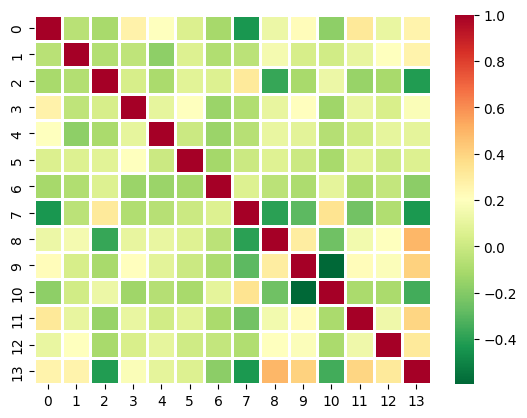

In [ ]:
### correlation을 확인해 봅시다.
### 일단 feature와 target값을 합쳐(concatenate) 봅시다.

df_cat = pd.concat([X_train,y_train], axis=1)

corr_mat=np.corrcoef(df_cat,rowvar=False)

sns.heatmap(corr_mat,linewidth=1,cmap='RdYlGn_r')
plt.show()


**채색의 종류**

https://matplotlib.org/stable/tutorials/colors/colormaps.html



In [ ]:
df_cat.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,0
38,1.207145,-1.497617,1.038216,1.319598,0.425629,-0.390236,0.876003,-0.070143,-0.688495,-0.219886,0.951318,-0.706293,-0.505828,0
48,-0.102398,-1.497617,1.038216,-0.201526,-0.592209,-0.390236,-0.999966,-1.467602,-0.688495,-0.917985,0.951318,-0.706293,-3.740280,0
258,0.879759,-1.497617,-0.950603,1.037909,-0.054483,-0.390236,0.876003,0.183940,1.452442,0.303689,-0.648305,-0.706293,-0.505828,1
266,0.115859,-1.497617,-0.950603,2.728047,1.539489,-0.390236,2.751972,-1.382907,1.452442,2.048936,-0.648305,-0.706293,-0.505828,1
244,0.224988,0.667727,-0.950603,0.023826,-1.206753,-0.390236,-0.999966,-1.891074,1.452442,0.914525,-0.648305,0.271320,-2.123054,1


In [ ]:
### 모양보기

X_train.shape

(227, 13)

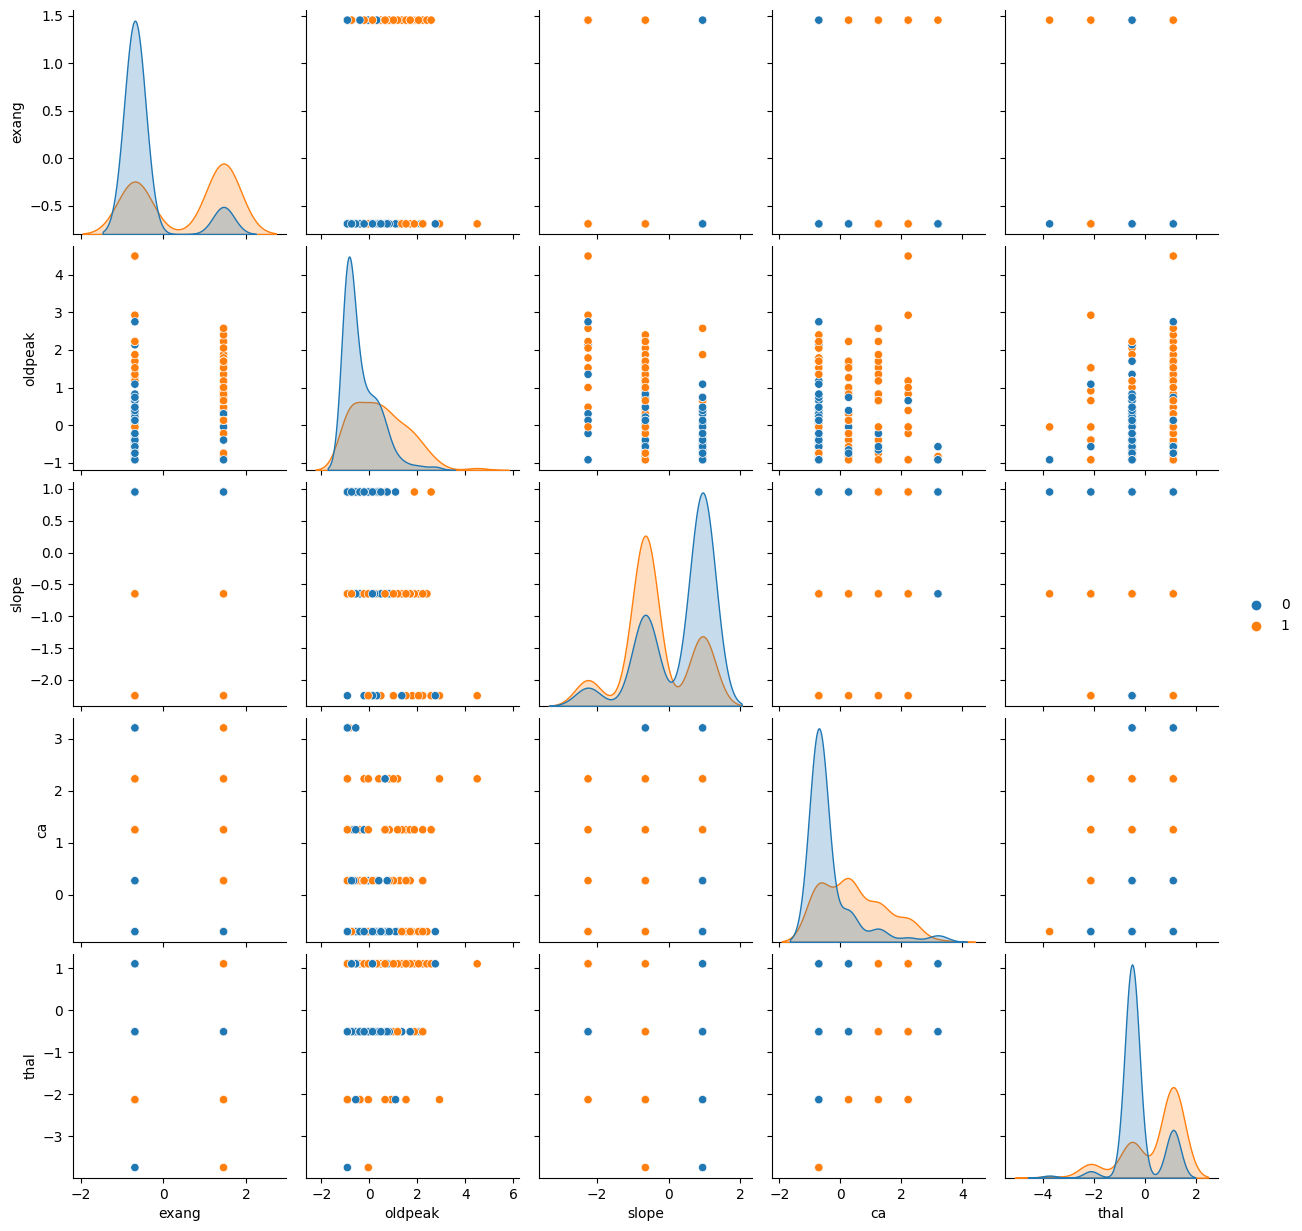

In [ ]:
### 전체 dataset의 산점도.... 너무 많아서 2번부터 끝까지의 freature로 산점도 만든다.

sns.pairplot(df_cat.iloc[:,8:], hue=0);
plt.show()

# **1. 기본적인 모델**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=13, activation='relu'))                 # input 입력받는 수와 같게 !!!!!
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

historyA=model.fit(X_train, y_train, epochs=70, batch_size=6)



Epoch 1/70
38/38 [==============================] - 2s 2ms/step - loss: 0.6942 - binary_accuracy: 0.5066
Epoch 2/70
38/38 [==============================] - 0s 2ms/step - loss: 0.5930 - binary_accuracy: 0.7577
Epoch 3/70
38/38 [==============================] - 0s 2ms/step - loss: 0.5295 - binary_accuracy: 0.8018
Epoch 4/70
38/38 [==============================] - 0s 2ms/step - loss: 0.4697 - binary_accuracy: 0.8062
Epoch 5/70
38/38 [==============================] - 0s 4ms/step - loss: 0.4279 - binary_accuracy: 0.8194
Epoch 6/70
38/38 [==============================] - 0s 3ms/step - loss: 0.3987 - binary_accuracy: 0.8238
Epoch 7/70
38/38 [==============================] - 0s 4ms/step - loss: 0.3802 - binary_accuracy: 0.8282
Epoch 8/70
38/38 [==============================] - 0s 4ms/step - loss: 0.3651 - binary_accuracy: 0.8282
Epoch 9/70
38/38 [==============================] - 0s 4ms/step - loss: 0.3534 - binary_accuracy: 0.8282
Epoch 10/70
38/38 [==============================] - 0s

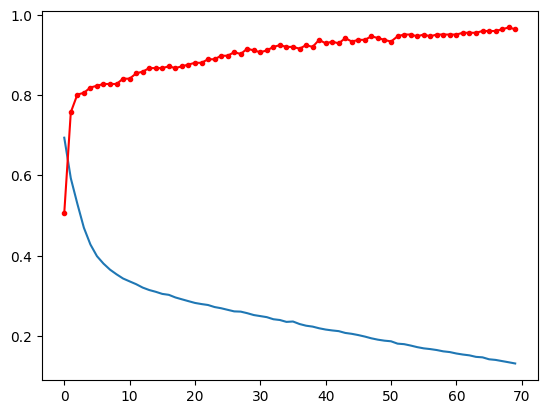

In [ ]:
y_loss = historyA.history['loss']
y_accu = historyA.history['binary_accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")     # 빨간색 정확도/ 파란색 손실값

plt.show()

In [ ]:
A=X_test.iloc[3,0:].to_numpy()

In [ ]:
B=A.reshape(1, 13)

In [ ]:
model.predict(B,verbose=0)  #[:10] # verbose=0: 예측 과정에서 출력 메시지를 표시하지 않도록.

array([[0.18499103]], dtype=float32)

In [ ]:
model.predict(X_test,verbose=0)[:10]

array([[0.99692124],
       [0.9408118 ],
       [0.00462753],
       [0.18499106],
       [0.98543674],
       [0.23962997],
       [0.99391115],
       [0.3553492 ],
       [0.06492256],
       [0.6695343 ]], dtype=float32)

# **2. Validation set을 사용하여 과적합 확인**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random

random.seed(5)

model = Sequential()                                                  # 딥러닝 모델의 구조를 결정합니다.
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])  # 딥러닝 모델을 실행합니다.

history=model.fit(X_train, y_train, validation_split=0.25, epochs=70, batch_size=16, verbose=1)


Epoch 1/70
11/11 [==============================] - 2s 80ms/step - loss: 0.7258 - binary_accuracy: 0.5118 - val_loss: 0.6554 - val_binary_accuracy: 0.6316
Epoch 2/70
11/11 [==============================] - 0s 8ms/step - loss: 0.6859 - binary_accuracy: 0.5294 - val_loss: 0.6393 - val_binary_accuracy: 0.6140
Epoch 3/70
11/11 [==============================] - 0s 8ms/step - loss: 0.6543 - binary_accuracy: 0.6000 - val_loss: 0.6225 - val_binary_accuracy: 0.6667
Epoch 4/70
11/11 [==============================] - 0s 9ms/step - loss: 0.6306 - binary_accuracy: 0.6882 - val_loss: 0.6046 - val_binary_accuracy: 0.7719
Epoch 5/70
11/11 [==============================] - 0s 9ms/step - loss: 0.6076 - binary_accuracy: 0.7471 - val_loss: 0.5805 - val_binary_accuracy: 0.8246
Epoch 6/70
11/11 [==============================] - 0s 8ms/step - loss: 0.5855 - binary_accuracy: 0.7588 - val_loss: 0.5578 - val_binary_accuracy: 0.8772
Epoch 7/70
11/11 [==============================] - 0s 9ms/step - loss: 0.5

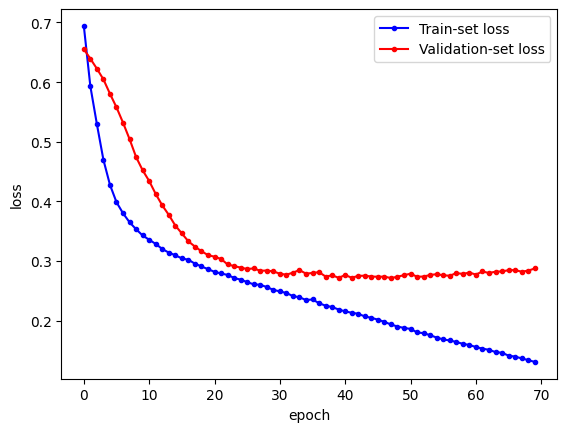

In [ ]:
y_val_loss = history.history['val_loss']

plt.plot(x_len,y_loss, marker='.', c="blue", label='Train-set loss')
plt.plot(x_len,y_val_loss, marker='.', c="red",label='Validation-set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

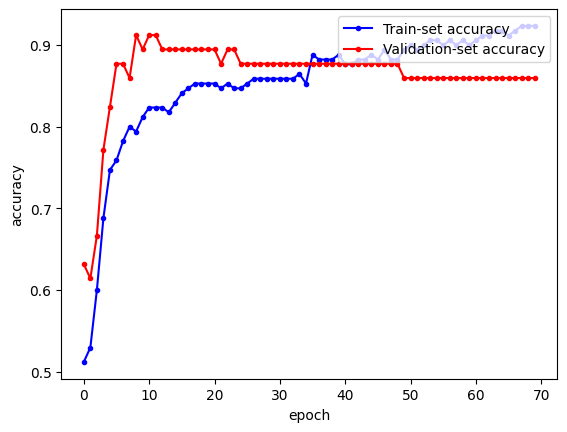

In [ ]:
y_accu = history.history['binary_accuracy']
y_val_accu = history.history['val_binary_accuracy']

plt.plot(x_len,y_accu, marker='.', c="blue", label='Train-set accuracy')
plt.plot(x_len,y_val_accu, marker='.', c="red",label='Validation-set accuracy')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

**Early Stopping을 위해서**

**from tensorflow.keras.callback inport ModelCheckpint, EarlyStopping**

**를 사용한다.**

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4197 - binary_accuracy: 0.8026


[0.41970640420913696, 0.8026315569877625]